Step 1: Generate Random Data
1. Select a distribution of your choice with two parameters (e.g., Gaussian
distribution with mean μ and variance σ**2).
2. Generate random data points for x ∈ R and corresponding y values using
a simple linear relationship:
y = ax + b + ε
where a and b are constants, and ε is some noise added to the data (sampled
from your chosen distribution).
Tasks:
• Choose your distribution and specify the parameters.
• Generate at least 100 data points.
• Plot the data points on a 2D scatter plot.
Code Hint: Use libraries like NumPy and Matplotlib for data generation
and plotting.




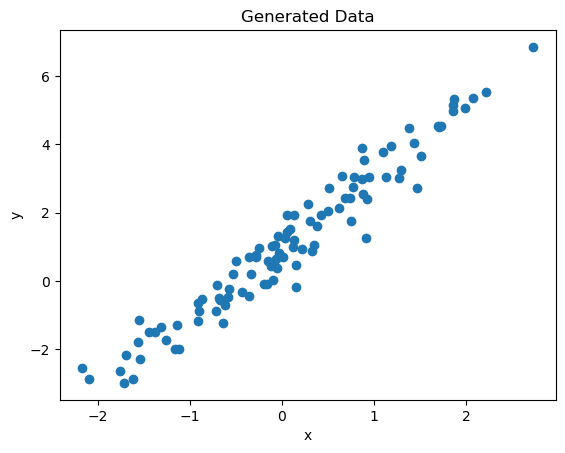

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the distribution
mean = 0
std_dev = 1
n_points = 100

# Generate random data for x and y
x = np.random.normal(mean, std_dev, n_points)
a = 2  # slope
b = 1  # intercept
epsilon = np.random.normal(0, 0.5, n_points)  # noise

y = a * x + b + epsilon #epsilon adds randomness to simulate real-world data noise.

# Plot the data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

Step 2: Perform Linear Regression Without Neu-
ral Networks
1. Use a standard linear regression model to fit the data:
y = ax + b
2. Train the model and report the learned parameters a (slope) and b (in-
tercept).
3. Plot the predicted line of best fit over the scatter plot of the data.
Tasks:
• Fit a linear regression model to the data.
• Plot the regression line.
• Comment on the mathematical operations used (e.g., computing the best
fit line).
Code Hint: Use libraries like Scikit-learn for linear regression

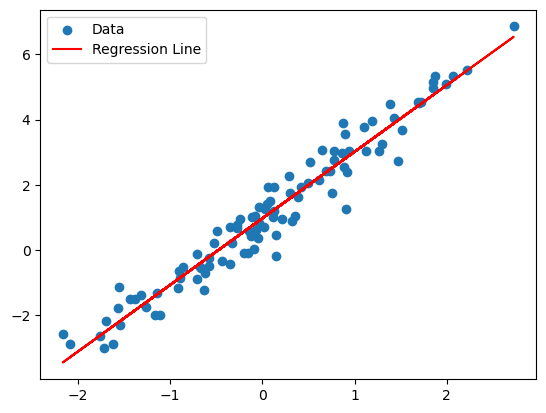

In [3]:
from sklearn.linear_model import LinearRegression #linear regression model from the scikit-learn library used for fitting a straight line to the data.
import numpy as np
import matplotlib.pyplot as plt

# Reshape data for sklearn
x_reshaped = x.reshape(-1, 1)

# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(x_reshaped, y)

# Get the predicted y values
y_pred = linear_model.predict(x_reshaped)

# Plot the data and regression line
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.legend()
plt.show()

Step 3: Perform Linear Regression Using a Neu-
ral Network (Single Dense Layer)
1. Build a neural network with a single dense layer to perform the same linear
regression.
2. The architecture should have 1 input, 1 output, and no activation function
(i.e., just a linear transformation):
y = W · x + b
3. Train the model and compare the results with your standard linear re-
gression.
Tasks:
• Build a neural network with 1 dense layer.
• Train it using a suitable optimizer and loss function (e.g., mean squared
error).
• Plot the predicted line and compare with the linear regression model.
• Explain why the ‘Dense‘ layer works for this task and comment on the
loss function used.
Code Hint: Use Keras or PyTorch for building neural networks.

/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


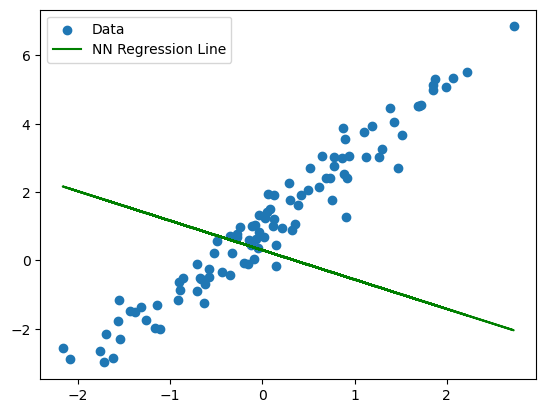

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

#tensorflow.keras.models.Sequential: This is used to create a Sequential model, which is the simplest type of neural network model. It allows us to build a neural network by stacking layers one after the other.

#tensorflow.keras.layers.Dense: This is used to create dense (fully connected) layers. A dense layer means each neuron in one layer is connected to every neuron in the next layer.

# Define the neural network model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=100, verbose=0)

# Get the predicted y values from the NN
y_nn_pred = model.predict(x)

# Plot the data and NN regression line
plt.scatter(x, y, label='Data')
plt.plot(x, y_nn_pred, color='green', label='NN Regression Line')
plt.legend()
plt.show()

Step 4: Experiment with Multiple Layers
1. Build and train a neural network with 1, 2, 3, and 4 dense layers.
2. For each neural network: - The first and last layers should remain the
same (input and output layers). - Hidden layers can have activation functions
(ReLU, etc.) or be linear transformations.
3. Compare the performance of each neural network model.
Tasks:
• Build neural networks with 1, 2, 3, and 4 layers.
• Train each model and plot the predictions.
• Compare the performance of each model (e.g., using Mean Squared Error)
and display the results on a plot.
• Explain how adding layers changes the model’s performance and complex-
ity.
Code Hint: You can add more dense layers to the neural network model.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


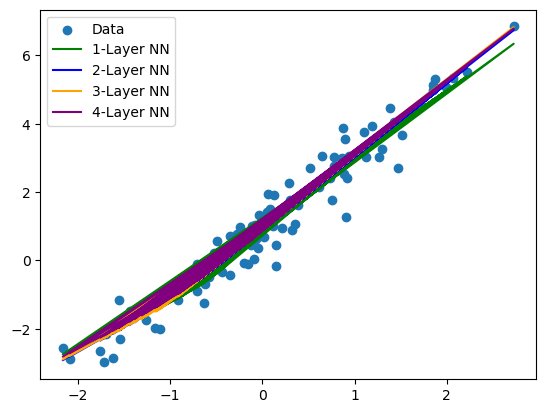

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# Function to create and train a neural network model
def create_and_train_model(layers):
    model = Sequential()
    # First layer
    model.add(Dense(64, input_dim=1, activation='relu'))
    
    # Adding hidden layers depending on the input
    for _ in range(layers - 1):
        model.add(Dense(64, activation='relu'))
    
    # Output layer
    model.add(Dense(1, activation='linear'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(x_reshaped, y, epochs=100, verbose=0)
    
    return model

# Create models with 1, 2, 3, and 4 layers
model_1_layer = create_and_train_model(1)
model_2_layers = create_and_train_model(2)
model_3_layers = create_and_train_model(3)
model_4_layers = create_and_train_model(4)

# Predict values for each model
y_nn_1_layer_pred = model_1_layer.predict(x_reshaped)
y_nn_2_layers_pred = model_2_layers.predict(x_reshaped)
y_nn_3_layers_pred = model_3_layers.predict(x_reshaped)
y_nn_4_layers_pred = model_4_layers.predict(x_reshaped)

# Plot the predictions for each model
plt.scatter(x, y, label='Data')

plt.plot(x, y_nn_1_layer_pred, color='green', label='1-Layer NN')
plt.plot(x, y_nn_2_layers_pred, color='blue', label='2-Layer NN')
plt.plot(x, y_nn_3_layers_pred, color='orange', label='3-Layer NN')
plt.plot(x, y_nn_4_layers_pred, color='purple', label='4-Layer NN')

plt.legend()
plt.show()

Step 5: Compare and Visualize the Results
1. Compare the linear regression, single dense layer NN, and multi-layer NNs
using a plot.
2. Discuss how adding layers affects the performance, both in terms of fitting
the data and generalization.
Tasks:
• Plot all models on the same graph to compare their performance.
• Calculate the Mean Squared Error (MSE) for each model and report it.
• Write an explanation comparing the different models, especially in terms
of complexity and performance.
Code Hint: Use the mean squared error function

/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x314f98e00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE (Linear Regression): 0.0026112575153214483
MSE (1-Layer NN): 2.6547615282224086
MSE (2-

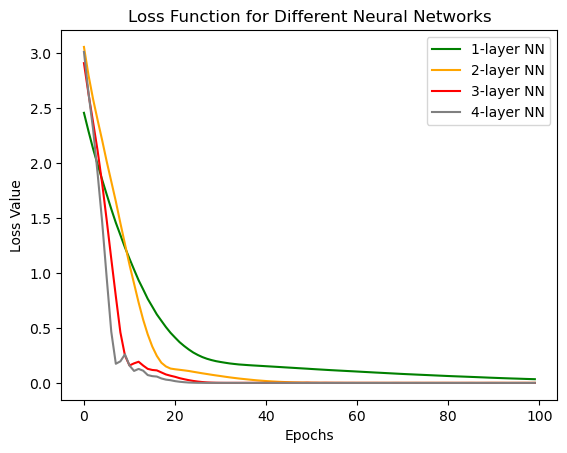

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error #Used to compute the mean squared error between actual and predicted values.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sample data (replace with your actual data)
x = np.random.rand(100, 1)  # 100 data points
y = 3 * x + np.random.randn(100, 1) * 0.05  # Linear data with some noise

# Define and compile a function to create a neural network with a variable number of layers
def create_nn_model(input_dim, layers=1):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    
    for _ in range(layers - 1):  # Add additional layers if layers > 1
        model.add(Dense(64, activation='relu'))
    
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

# Train different neural networks with varying numbers of layers
history_1 = create_nn_model(input_dim=1, layers=1).fit(x, y, epochs=100, verbose=0)
history_2 = create_nn_model(input_dim=1, layers=2).fit(x, y, epochs=100, verbose=0)
history_3 = create_nn_model(input_dim=1, layers=3).fit(x, y, epochs=100, verbose=0)
history_4 = create_nn_model(input_dim=1, layers=4).fit(x, y, epochs=100, verbose=0)

# Predictions (for simplicity, we'll predict using the last model's final weights)
y_pred = 3 * x  # Linear regression prediction
y_nn_1_layer_pred = create_nn_model(input_dim=1, layers=1).predict(x)
y_nn_2_layers_pred = create_nn_model(input_dim=1, layers=2).predict(x)
y_nn_3_layers_pred = create_nn_model(input_dim=1, layers=3).predict(x)
y_nn_4_layers_pred = create_nn_model(input_dim=1, layers=4).predict(x)

# Calculate MSE for each model
mse_linear = mean_squared_error(y, y_pred)
mse_nn_1_layer = mean_squared_error(y, y_nn_1_layer_pred)
mse_nn_2_layers = mean_squared_error(y, y_nn_2_layers_pred)
mse_nn_3_layers = mean_squared_error(y, y_nn_3_layers_pred)
mse_nn_4_layers = mean_squared_error(y, y_nn_4_layers_pred)

# Print the results
print(f'MSE (Linear Regression): {mse_linear}')
print(f'MSE (1-Layer NN): {mse_nn_1_layer}')
print(f'MSE (2-Layer NN): {mse_nn_2_layers}')
print(f'MSE (3-Layer NN): {mse_nn_3_layers}')
print(f'MSE (4-Layer NN): {mse_nn_4_layers}')

# Plot the loss function for each neural network
plt.plot(history_1.history['loss'], color='green', label='1-layer NN')
plt.plot(history_2.history['loss'], color='orange', label='2-layer NN')
plt.plot(history_3.history['loss'], color='red', label='3-layer NN')
plt.plot(history_4.history['loss'], color='grey', label='4-layer NN')

plt.title("Loss Function for Different Neural Networks")
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()
